In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [2]:
data = pd.read_csv("Scaled_BreastCancer_Data.csv")

In [3]:
data = data.drop(['Unnamed: 0'], axis=1) #dropping unnamed coloumn

#Selecting x and y from features to predict the Target coloumn
X = data.drop(["Target"], axis=1)
y = data.Target.values

In [4]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
featsel = ExtraTreesRegressor(n_estimators=50) #can change the number of n_estimators
featsel = featsel.fit(X, y)
featsel.feature_importances_  
model = SelectFromModel(featsel, prefit=True)
X_new = model.transform(X)              

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [5]:
from sklearn.model_selection import train_test_split 

#80 20 split for training and testing
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

btree = tree.DecisionTreeClassifier(max_depth = 4, random_state=1)
btree = btree.fit(x_train, y_train)

[Text(0.5208333333333334, 0.9, 'X[5] <= -0.036\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.2708333333333333, 0.7, 'X[7] <= 0.674\ngini = 0.064\nsamples = 271\nvalue = [9, 262]'),
 Text(0.16666666666666666, 0.5, 'X[7] <= 0.311\ngini = 0.03\nsamples = 265\nvalue = [4, 261]'),
 Text(0.08333333333333333, 0.3, 'X[3] <= -0.356\ngini = 0.008\nsamples = 254\nvalue = [1, 253]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 216\nvalue = [0, 216]'),
 Text(0.125, 0.1, 'gini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.25, 0.3, 'X[6] <= -0.275\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.5, 'X[1] <= -0.248\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4166666666666667, 0.3, 'X[6] <= -0.348\ngini = 0.5\nsamples = 2\nval

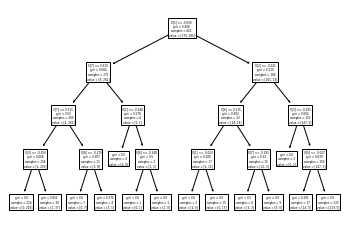

In [7]:
tree.plot_tree(btree)

In [8]:
#score for the training set
train = btree.score(x_train, y_train)
print("Training Accuracy Score for Basic Trees Model:", train*100)

accuracy = btree.score(x_test, y_test)
print("Testing Accuracy Score for Basic Trees Model:", accuracy*100)

Training Accuracy Score for Basic Trees Model: 98.24175824175823
Testing Accuracy Score for Basic Trees Model: 93.85964912280701


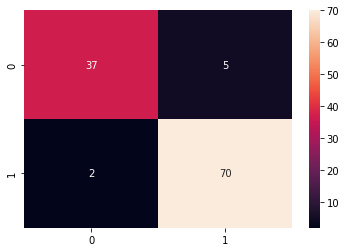

In [9]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.metrics import confusion_matrix

y_pred_train = btree.predict(x_train)
y_pred_test = btree.predict(x_test)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [10]:
n_classes = 2 # Benign or Malignant

y_test_list = y_test.tolist()


from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_test)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

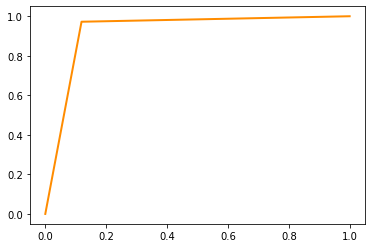

In [11]:
plt.figure()
lw = 2
plt.plot(
    fpr["micro"],
    tpr["micro"],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc["micro"],
)